## General Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os.path
from datetime import datetime
from datetime import date
from dateutil import parser
#import pickle
#import asyncio
from datetime import timedelta
import dateutil.parser
import imp
import json
import statistics
#import random

#from binance.client import Client

#import api
#import get_uptodate_binance_data
#import generate_random_file
#import track_pnl

In [2]:
%%time

filename = 'BTCUSDT-1d-binance.csv'
timeframe = '1h'
OHLC_directory = 'C://Users//liuye//ForPython//Data//'
complete_file_path = OHLC_directory + filename
dff = pd.read_csv(complete_file_path)

Wall time: 203 ms


Deleting the 'Unnamed: 0' column

In [3]:
dff = dff.drop(['Unnamed: 0','time_diff_in_days','time_diff_in_min'], axis=1)
df = dff

Adding log-return

In [4]:
df['open'] = np.log(dff['open'])
df['high'] = np.log(dff['high'])
df['low'] = np.log(dff['low'])
df['close'] = np.log(dff['close'])

In [5]:
df

,timestamp,open,high,low,close,volume
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060
...,...,...,...,...,...,...
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805
1444,2021-07-31,10.650326,10.656035,10.621331,10.632529,44849.791012


# Analysing log-return by day

In [6]:
df['datetime'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['day'] = df['datetime'].dt.day_name()
df['week'] = df['datetime'].dt.week
df['month'] = df['datetime'].dt.month_name()

C:\Users\liuye\anaconda3\envs\work\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
df

,timestamp,open,high,low,close,volume,datetime,day,week,month
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377,2017-08-17,Thursday,33,August
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264,2017-08-18,Friday,33,August
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763,2017-08-19,Saturday,33,August
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022,2017-08-20,Sunday,33,August
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060,2017-08-21,Monday,34,August
...,...,...,...,...,...,...,...,...,...,...
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441,2021-07-28,Wednesday,30,July
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283,2021-07-29,Thursday,30,July
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805,2021-07-30,Friday,30,July
1444,2021-07-31,10.650326,10.656035,10.621331,10.632529,44849.791012,2021-07-31,Saturday,30,July


df['hiop'] = df['high'] - df['open']
df['hilo'] = df['high'] - df['low']
df['oplo'] = df['open'] - df['low']
df['opcl'] = df['open'] - df['close']
df

In [8]:
df['opcl'] = df['open'] - df['close']
values = df['opcl'][1:].values
df= df.drop(1445)
df['opclN'] = values

In [9]:
df

,timestamp,open,high,low,close,volume,datetime,day,week,month,opcl,opclN
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377,2017-08-17,Thursday,33,August,-0.005523,0.042113
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264,2017-08-18,Friday,33,August,0.042113,-0.007665
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763,2017-08-19,Saturday,33,August,-0.007665,0.008454
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022,2017-08-20,Sunday,33,August,0.008454,0.013143
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060,2017-08-21,Monday,34,August,0.013143,-0.005958
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2021-07-27,10.525174,10.585134,10.501857,10.582989,88397.267015,2021-07-27,Tuesday,30,July,-0.057814,-0.014167
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441,2021-07-28,Wednesday,30,July,-0.014167,0.000077
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283,2021-07-29,Thursday,30,July,0.000077,-0.053230
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805,2021-07-30,Friday,30,July,-0.053230,0.017798


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression

Xtrain = df[['open','high','low','close','volume']]
ytrain = df[['opclN']]


model = LinearRegression().fit( Xtrain,ytrain)
model.score(Xtrain,ytrain)

0.006008596189346682

We found that there is not evident correlation between previous price and following price.

<AxesSubplot:>

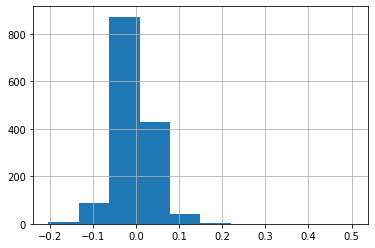

In [21]:
import seaborn as sns
df['opclN'].hist()

C:\Users\liuye\anaconda3\envs\work\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


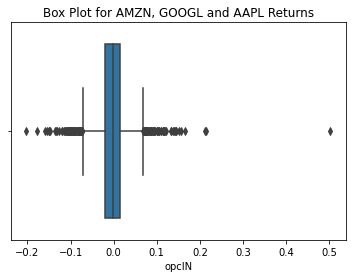

In [29]:
sns.boxplot(df['opclN'])
plt.title('Box Plot for AMZN, GOOGL and AAPL Returns')
plt.show()

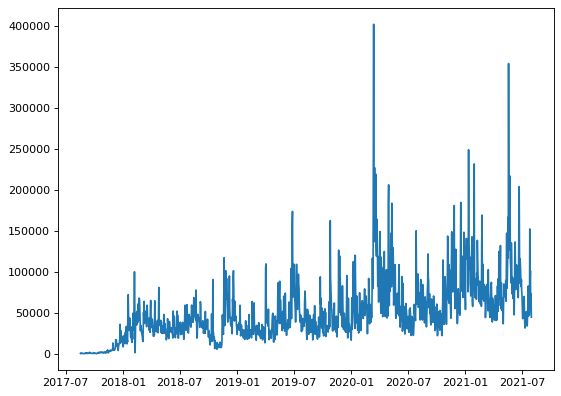

In [37]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(df['datetime'],df['volume'])

plt.show()

In [30]:
df

,timestamp,open,high,low,close,volume,datetime,day,week,month,opcl,opclN
0,2017-08-17,8.357372,8.408581,8.343016,8.362895,795.150377,2017-08-17,Thursday,33,August,-0.005523,0.042113
1,2017-08-18,8.362895,8.382866,8.278624,8.320782,1199.888264,2017-08-18,Friday,33,August,0.042113,-0.007665
2,2017-08-19,8.320782,8.339188,8.255828,8.328446,381.309763,2017-08-19,Saturday,33,August,-0.007665,0.008454
3,2017-08-20,8.323846,8.345474,8.302172,8.315393,467.083022,2017-08-20,Sunday,33,August,0.008454,0.013143
4,2017-08-21,8.311184,8.323516,8.271750,8.298042,691.743060,2017-08-21,Monday,34,August,0.013143,-0.005958
...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2021-07-27,10.525174,10.585134,10.501857,10.582989,88397.267015,2021-07-27,Tuesday,30,July,-0.057814,-0.014167
1441,2021-07-28,10.582957,10.618885,10.565454,10.597124,101344.528441,2021-07-28,Wednesday,30,July,-0.014167,0.000077
1442,2021-07-29,10.597124,10.612508,10.576432,10.597047,53998.439283,2021-07-29,Thursday,30,July,0.000077,-0.053230
1443,2021-07-30,10.597097,10.652937,10.553551,10.650326,73602.784805,2021-07-30,Friday,30,July,-0.053230,0.017798
